# Accidental Deaths by Guns Data Exploration

Taking a look at accidental gun death data provided by the Gun Violence Archive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in csv files into pandas dataframes to work with the data

In [2]:
accDeaths = pd.read_csv("accidental_deaths.csv")
accChildDeaths = pd.read_csv("accidental_deaths_children.csv")
accTeenDeaths = pd.read_csv("accidental_deaths_teens.csv")

accInjured = pd.read_csv("accidental_injuries.csv")
accChildInjured = pd.read_csv("accidental_injuries_children.csv")
accTeenInjured = pd.read_csv("accidental_injuries_teens.csv")


In [3]:
print(accDeaths.shape)
print(accChildDeaths.shape)
print(accTeenDeaths.shape)
print(accInjured.shape)
print(accChildInjured.shape)
print(accTeenInjured.shape)

(500, 7)
(206, 7)
(290, 7)
(500, 7)
(467, 7)
(500, 7)


Taking a look at the shape of the dataframes. All have 7 columns with varying row values

In [4]:
accDeaths.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"November 26, 2016",Maryland,Sabillasville,6600 block of Eylers Valley Flint Road,1,0,NaN
1,"November 26, 2016",Ohio,Grand Rapids,SR Route 65,1,0,NaN
2,"November 24, 2016",New York,Sandy Creek,Kehoe Road,1,0,NaN
3,"November 24, 2016",Florida,Black Point,NaN,1,0,NaN
4,"November 23, 2016",Michigan,Powell Township,North 1311 County Road KCI,1,0,NaN


In [5]:
accInjured.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"November 26, 2016",Florida,Hudson,7031 Oakley Avenue,0,1,NaN
1,"November 25, 2016",Montana,Billings,308 6th Avenue North,0,2,NaN
2,"November 25, 2016",Arizona,Tucson,5850 East Broadway Blvd,0,1,NaN
3,"November 25, 2016",California,San Diego,4333 Home Avenue,0,2,NaN
4,"November 24, 2016",Pennsylvania,Philadelphia,3500 N 9th Street,0,1,NaN


The 'Operations' column is filled with 'NaN' values and is useless. Will drop it from each dataframe

In [6]:
accDeaths = accDeaths.drop('Operations', axis=1)
accChildDeaths = accChildDeaths.drop('Operations', axis=1)
accTeenDeaths = accTeenDeaths.drop('Operations', axis=1)
accInjured = accInjured.drop('Operations', axis=1)
accChildInjured = accChildInjured.drop('Operations', axis=1)
accTeenInjured = accTeenInjured.drop('Operations', axis=1)

In [7]:
accDeaths.describe()

,# Killed,# Injured
count,500.000000,500.000000
mean,1.012000,0.034000
std,0.141052,0.211976
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,3.000000,2.000000


In [8]:
accDeaths['Address'].isnull().sum()

41

In [9]:
accDeaths = accDeaths.dropna()

In [10]:
accDeaths.shape

(459, 6)

In [11]:
accChildDeaths.describe()

,# Killed,# Injured
count,206.000000,206.000000
mean,1.000000,0.043689
std,0.098773,0.247985
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,2.000000,2.000000


In [12]:
accChildDeaths.isnull().any()

Incident Date     False
State             False
City Or County    False
Address            True
# Killed          False
# Injured         False
dtype: bool

In [13]:
accChildDeaths = accChildDeaths.dropna()

In [14]:
accChildDeaths.describe()

,# Killed,# Injured
count,192.000000,192.000000
mean,1.000000,0.046875
std,0.102329,0.256620
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,2.000000,2.000000


In [15]:
accChildDeaths['isChild'] = 1

In [16]:
accDeaths['isChild'] = 0
accDeaths['isTeen'] = 0
accChildDeaths['isTeen'] = 0

Created a column to mark whether a record was from the child or the teen dataset. Could be useful if I want to filter on that criteria.

In [17]:
accTeenDeaths.describe()

,# Killed,# Injured
count,290.000000,290.000000
mean,1.013793,0.020690
std,0.165803,0.165082
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,3.000000,2.000000


In [18]:
accTeenDeaths.isnull().any()

Incident Date     False
State             False
City Or County    False
Address            True
# Killed          False
# Injured         False
dtype: bool

In [19]:
accTeenDeaths = accTeenDeaths.dropna()

In [20]:
accTeenDeaths.describe()

,# Killed,# Injured
count,278.000000,278.000000
mean,1.014388,0.021583
std,0.169331,0.168563
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,3.000000,2.000000


In [21]:
accTeenDeaths['isTeen'] = 1
accTeenDeaths['isChild'] = 0

Was looking at some of the statistics behind each dataset and getting rid of any null values. Some addresses were missing in each dataset so I dropped those records.

In [22]:
accTeenDeaths.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,isTeen,isChild
0,"November 22, 2016",Indiana,Anderson,1600 block of West 7th Street,1,0,1,0
1,"November 22, 2016",Virginia,Christiansburg,700 block of Dabney Road,1,0,1,0
2,"November 12, 2016",Colorado,La Salle,18000 block of County Road 43,1,0,1,0
4,"November 8, 2016",Virginia,Hampton,500 block of Pennsylvania Ave,1,0,1,0
5,"November 7, 2016",Pennsylvania,New Kensington (Arnold),1417 Orchard Ave,1,0,1,0


In [23]:
child_rows = accDeaths.merge(accChildDeaths, how='inner', on='Address')
teen_rows = accDeaths.merge(accTeenDeaths, how='inner', on='Address')

accDeaths['isChild'] = accDeaths['Address'].isin(child_rows['Address'])
accDeaths['isTeen'] = accDeaths['Address'].isin(teen_rows['Address'])

Some of the records in the child and teen dataset were in the accidental death dataset. So I updated the 'isChild' and 'isTeen' field in the accidental death dataset to indicate if that record was found in one of the other datasets. Then cast the boolean value as an integer.

In [24]:
accDeaths.isChild = accDeaths.isChild.astype(int)
accDeaths.isTeen = accDeaths.isTeen.astype(int)

In [25]:
accDeaths.describe()

,# Killed,# Injured,isChild,isTeen
count,459.000000,459.000000,459.000000,459.000000
mean,1.013072,0.037037,0.191721,0.283224
std,0.147183,0.221006,0.394084,0.451056
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000


In [26]:
not_dup_child = ~accChildDeaths['Address'].isin(child_rows['Address'])
not_dup_teen = ~accTeenDeaths['Address'].isin(teen_rows['Address'])

In [27]:
newChildData = accChildDeaths[not_dup_child]

In [28]:
newTeenData = accTeenDeaths[not_dup_teen]
newTeenData.describe()

,# Killed,# Injured,isTeen,isChild
count,148.0,148.000000,148.0,148.0
mean,1.0,0.006757,1.0,0.0
std,0.0,0.082199,0.0,0.0
min,1.0,0.000000,1.0,0.0
25%,1.0,0.000000,1.0,0.0
50%,1.0,0.000000,1.0,0.0
75%,1.0,0.000000,1.0,0.0
max,1.0,1.000000,1.0,0.0


Created new Child and Teen datasets to exclude any records that were found in the accidental deaths dataset.

In [29]:
updatedAccDeaths = pd.concat([accDeaths, newTeenData, newChildData])

Updated the accidental deaths dataset to include record from Child and Teen datasets that weren't found in the accidental deaths dataset. This should give us a more complete dataset for me to work with.

In [30]:
updatedAccDeaths.head()

,# Injured,# Killed,Address,City Or County,Incident Date,State,isChild,isTeen
0,0,1,6600 block of Eylers Valley Flint Road,Sabillasville,"November 26, 2016",Maryland,0,0
1,0,1,SR Route 65,Grand Rapids,"November 26, 2016",Ohio,0,0
2,0,1,Kehoe Road,Sandy Creek,"November 24, 2016",New York,0,0
4,0,1,North 1311 County Road KCI,Powell Township,"November 23, 2016",Michigan,0,0
5,0,1,Highway 47 West,Troy,"November 23, 2016",West Virginia,1,0


In [31]:
updatedAccDeaths.describe()

,# Injured,# Killed,isChild,isTeen
count,711.000000,711.000000,711.000000,711.000000
mean,0.030942,1.007032,0.270042,0.390999
std,0.203211,0.124272,0.444294,0.488318
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000
max,2.000000,3.000000,1.000000,1.000000


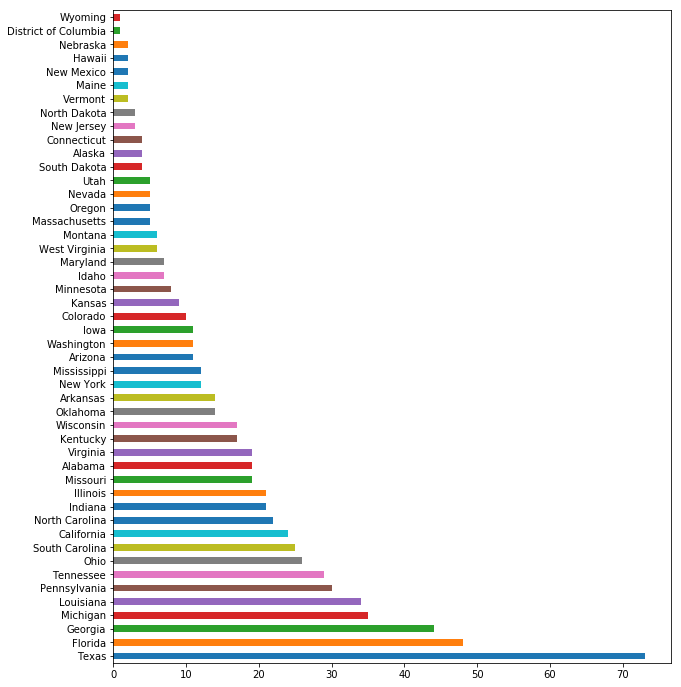

In [32]:
updatedAccDeaths.State.value_counts().plot(kind='barh', figsize=(10, 12))

Chart of number of incidents per state. This is a nice visualization of the count but looking at incidents based of the population of each state might be more meaningful. No surprise Texas is at the top given its population and lax gun laws.

In [33]:
statePopulations = pd.read_excel("state_populations.xlsx")

Brought in population data from census.gov. I'm gonna use 2016 data.

In [34]:
statePopulations.head(20)

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,2010-04-01 00:00:00,NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
3,United States,308745538,308758105,309338421,311644280.0,313993272.0,316234505.0,318622525.0,321039839.0,323405935.0,325719178.0
4,Northeast,55317240,55318350,55388349,55642659.0,55860261.0,56047732.0,56203078.0,56296628.0,56359360.0,56470581.0
5,Midwest,66927001,66929794,66973360,67141501.0,67318295.0,67534451.0,67720120.0,67839187.0,67978168.0,68179351.0
6,South,114555744,114563024,114869241,116060993.0,117291728.0,118422269.0,119699966.0,121081238.0,122423457.0,123658624.0
7,West,71945553,71946937,72107471,72799127.0,73522988.0,74230053.0,74999361.0,75822786.0,76644950.0,77410622.0
8,.Alabama,4779736,4780135,4785579,4798649.0,4813946.0,4827660.0,4840037.0,4850858.0,4860545.0,4874747.0
9,.Alaska,710231,710249,714015,722259.0,730825.0,736760.0,736759.0,737979.0,741522.0,739795.0


In [35]:
statePopulations = statePopulations.drop([0,1,2,3,4,5,6,7], axis=0)
statePopulations.head()

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
8,.Alabama,4779736,4780135,4785579,4798649.0,4813946.0,4827660.0,4840037.0,4850858.0,4860545.0,4874747.0
9,.Alaska,710231,710249,714015,722259.0,730825.0,736760.0,736759.0,737979.0,741522.0,739795.0
10,.Arizona,6392017,6392309,6407002,6465488.0,6544211.0,6616124.0,6706435.0,6802262.0,6908642.0,7016270.0
11,.Arkansas,2915918,2916031,2921737,2938640.0,2949208.0,2956780.0,2964800.0,2975626.0,2988231.0,3004279.0
12,.California,37253956,37254518,37327690,37672654.0,38019006.0,38347383.0,38701278.0,39032444.0,39296476.0,39536653.0


In [36]:
statePopulations.columns

Index(['table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [37]:
statePopulations = statePopulations.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 10'], axis=1)

In [38]:
statePopulations.head()

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 9
8,.Alabama,4860545.0
9,.Alaska,741522.0
10,.Arizona,6908642.0
11,.Arkansas,2988231.0
12,.California,39296476.0


In [39]:
statePopulations = statePopulations.rename(index=str, 
                        columns={'table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)': 'State', 'Unnamed: 9': 'Population'})
statePopulations.head()

,State,Population
8,.Alabama,4860545.0
9,.Alaska,741522.0
10,.Arizona,6908642.0
11,.Arkansas,2988231.0
12,.California,39296476.0


In [40]:
statePopulations = statePopulations.drop(['59', '60', '61', '62', '63', '64', '65'], axis=0)

In [41]:
statePopulations.Population = statePopulations.Population.astype(int)
statePopulations.tail()

,State,Population
54,.Virginia,8414380
55,.Washington,7280934
56,.West Virginia,1828637
57,.Wisconsin,5772917
58,.Wyoming,584910


In [42]:
statePopulations['State'] = statePopulations['State'].map(lambda x: x.lstrip('.'))

This was a lot of data cleaning to just extract the 2016 population data. Probably an easier way, or maybe a better dataset, to do this with.

In [43]:
statePopulations

,State,Population
8,Alabama,4860545
9,Alaska,741522
10,Arizona,6908642
11,Arkansas,2988231
12,California,39296476
13,Colorado,5530105
14,Connecticut,3587685
15,Delaware,952698
16,District of Columbia,684336
17,Florida,20656589


In [44]:
statePopulations['Per 100,000'] = round(statePopulations['Population'] / 100000, 2)

Instead of using total population I created a column to scale it down to per 100,000 people. Using this instead of population should give me cleaner numbers to work with.

In [45]:
statePopulations.count()

State          51
Population     51
Per 100,000    51
dtype: int64

In [46]:
stateCounts = updatedAccDeaths.State.value_counts()
updatedAccDeaths.State.count()

711

In [47]:
statesCounts = stateCounts.to_frame()

Created a dataframe of the count of incidents for each state. Then will merge this dataframe with the population dataframe.

In [48]:
statesCounts['States'] = statesCounts.index

In [49]:
statesCounts = statesCounts.rename(index=str, columns={'State':'Count','States':'State'})

In [50]:
statesCounts.count()

Count    48
State    48
dtype: int64

In [51]:
stateGunStats = pd.merge(statesCounts, statePopulations, how='inner', on='State')

In [52]:
stateGunStats['Incidents Per 100,000'] = stateGunStats['Count'] / stateGunStats['Per 100,000']

In [53]:
stateGunStats = stateGunStats.set_index('State')
stateGunStats.head()

,Count,Population,"Per 100,000","Incidents Per 100,000"
State,,,,
Texas,73,27904862,279.05,0.261602
Florida,48,20656589,206.57,0.232367
Georgia,44,10313620,103.14,0.426605
Michigan,35,9933445,99.33,0.352361
Louisiana,34,4686157,46.86,0.725566


In [54]:
stateGunStats = stateGunStats.sort_index()

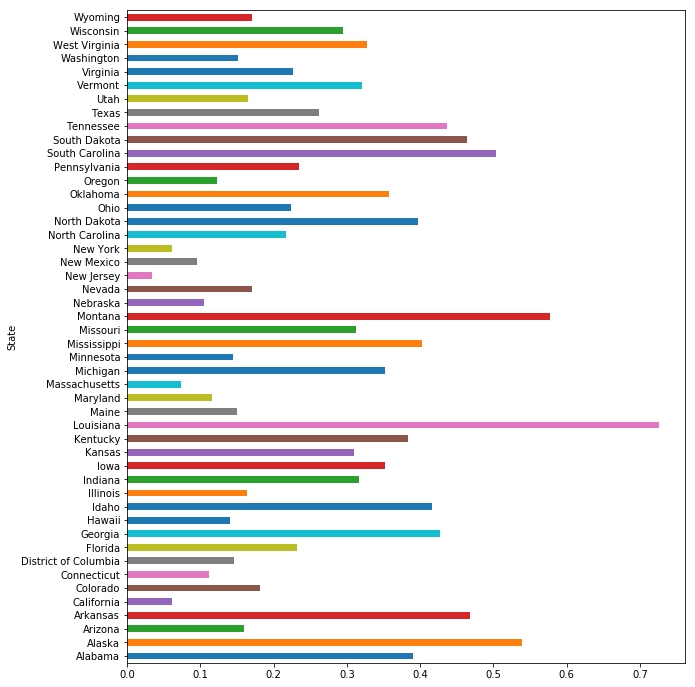

In [55]:
stateGunStats['Incidents Per 100,000'].plot(kind='barh', figsize=(10, 12))

So now I see a much different looking chart, with Louisiana with the most incidents per 100,000 people at just above 0.7. Texas, which was leading in number of incidents, falls to the middle of the pack when population is taken into account.

In [56]:
stateGrouped = updatedAccDeaths.groupby('State').sum()

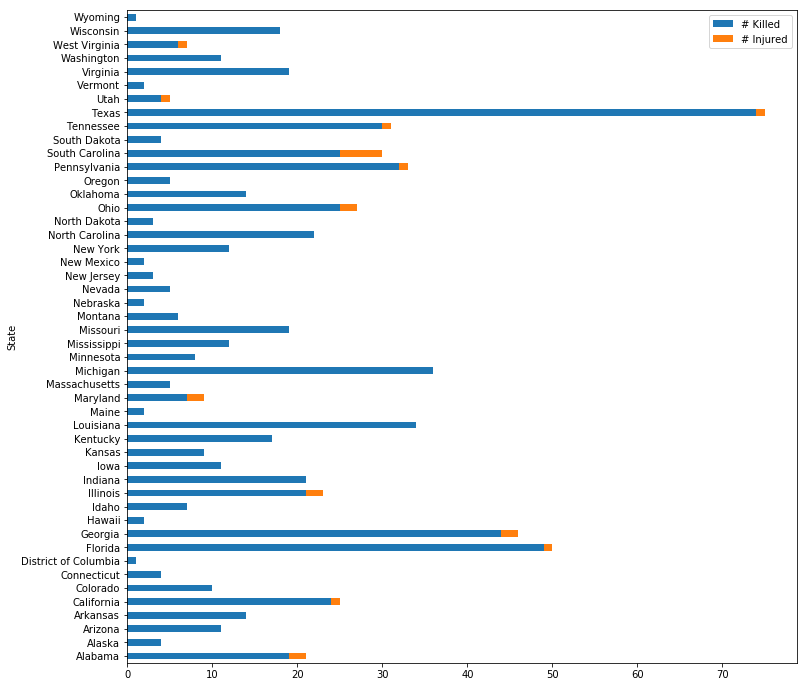

In [57]:
stateGrouped[['# Killed','# Injured']].plot.barh(stacked=True, figsize=(12, 12))

Grouped the incidents by states to get the count of people killed and injured. Number of people killed take up most of the numbers, which makes sense because we're only looking at the death datasets.

In [58]:
stateGrouped['Killed per 100,000'] = stateGrouped['# Killed'] / stateGunStats['Per 100,000']

In [59]:
stateGrouped.head()

,# Injured,# Killed,isChild,isTeen,"Killed per 100,000"
State,,,,,
Alabama,2,19,8,6,0.390866
Alaska,0,4,1,1,0.539084
Arizona,0,11,4,3,0.159213
Arkansas,0,14,5,4,0.468541
California,1,24,4,9,0.061075


Text(0.5,1,'People Killed per 100,000 by State')

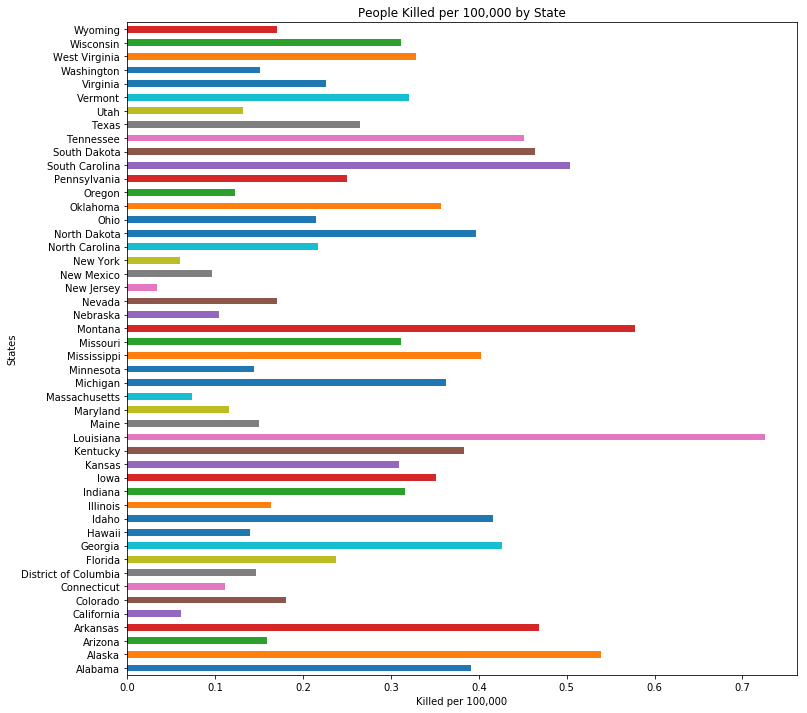

In [60]:
chart = stateGrouped['Killed per 100,000'].plot.barh(figsize=(12,12))

chart.set_xlabel("Killed per 100,000")
chart.set_ylabel("States")
chart.set_title("People Killed per 100,000 by State")

Look at the number of people killed per 100,000 by state. Not all that different from number of incidents. I'd assume that's because accidental deaths rarely have more then 1 person killed at a time since they are accidents. And if you look at the descriptive statistics of the updatedAccDeath dataframe from earlier, you'll see the mean is 1.007032 killed with a max of only 3.

Possible Next Steps:
<br>
1) Look at gun ownership data in each state. Correlations?
<br>
2) Look at how states voted. Are Republican or Democratic states more likely to have accidental deaths?
<br>
3) Look at how state gun laws correlate to accidental deaths

In [61]:
gunOwnership = pd.read_csv('https://www.openintro.org/stat/data/gun_violence_us.csv')
gunOwnership.count()

state             50
mortality_rate    50
ownership_rate    50
dtype: int64

Load dataset of gun ownership rate for each state

In [62]:
RI = gunOwnership['state'] == 'RI'
DE = gunOwnership['state'] == 'DE'
gunOwnership[DE | RI]

,state,mortality_rate,ownership_rate
7,DE,11.1,0.052
38,RI,2.9,0.058


In [63]:
gunOwnership = gunOwnership.drop([7,38])

In [64]:
NH = gunOwnership['state'] == 'NH'
gunOwnership[NH]

,state,mortality_rate,ownership_rate
28,NH,8.6,0.144


In [65]:
gunOwnership = gunOwnership.drop([28])

In [66]:
stateGrouped = stateGrouped.drop(['District of Columbia'])

In [67]:
print(gunOwnership.count())
print(stateGrouped.count())

state             47
mortality_rate    47
ownership_rate    47
dtype: int64
# Injured             47
# Killed              47
isChild               47
isTeen                47
Killed per 100,000    47
dtype: int64


In [68]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [69]:
for index, row in gunOwnership.iterrows():
    for key in states:
        if row['state'] == key:
            gunOwnership.set_value(index, 'state', states[key])

/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


Used states dictionary of abbreviations and full state names to convert the abbreviations in gun ownership dataframe to the full state name. The state field now corresponds the state field in the stateGrouped dataframe and will be used as the key to merge the 2 datasets.

In [70]:
gunOwnership.head()

,state,mortality_rate,ownership_rate
0,Alabama,16.7,0.489
1,Alaska,18.8,0.617
2,Arizona,13.4,0.323
3,Arkansas,16.4,0.579
4,California,7.4,0.201


In [71]:
stateGrouped.columns

Index(['# Injured', '# Killed', 'isChild', 'isTeen', 'Killed per 100,000'], dtype='object')

In [72]:
stateGrouped['state'] = stateGrouped.index
stateGrouped.head()

,# Injured,# Killed,isChild,isTeen,"Killed per 100,000",state
State,,,,,,
Alabama,2,19,8,6,0.390866,Alabama
Alaska,0,4,1,1,0.539084,Alaska
Arizona,0,11,4,3,0.159213,Arizona
Arkansas,0,14,5,4,0.468541,Arkansas
California,1,24,4,9,0.061075,California


In [73]:
gunOwnByState = stateGrouped.merge(gunOwnership, how='inner', on='state')
gunOwnByState.head()

,# Injured,# Killed,isChild,isTeen,"Killed per 100,000",state,mortality_rate,ownership_rate
0,2,19,8,6,0.390866,Alabama,16.7,0.489
1,0,4,1,1,0.539084,Alaska,18.8,0.617
2,0,11,4,3,0.159213,Arizona,13.4,0.323
3,0,14,5,4,0.468541,Arkansas,16.4,0.579
4,1,24,4,9,0.061075,California,7.4,0.201


Merged the 2 datasets so Killed per 100,000 and ownership_rate were in the same dataframe. Now we can plot them together.

Text(0.5,1,'People Killed per 100,000 vs State Ownership Rate')

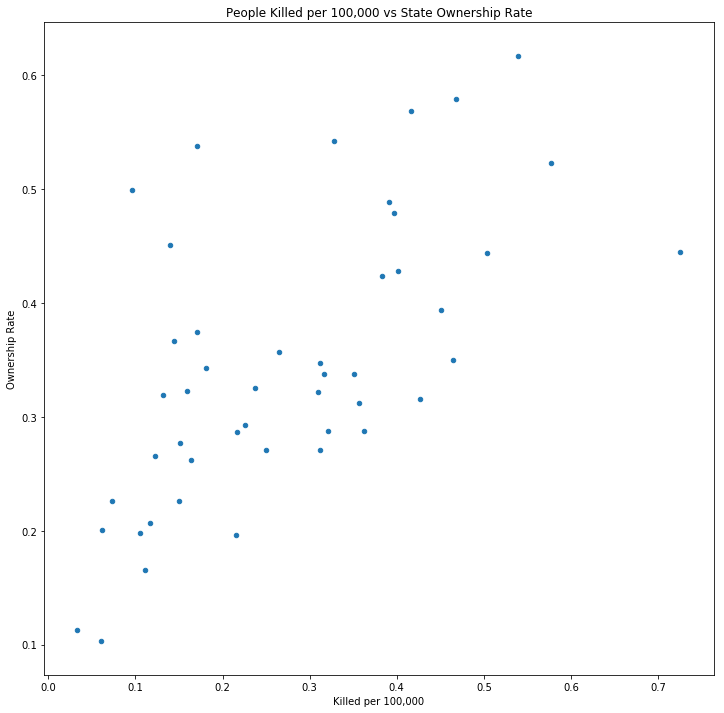

In [74]:
chart2 = gunOwnByState.plot.scatter('Killed per 100,000', 'ownership_rate', figsize=(12,12))

chart2.set_xlabel("Killed per 100,000")
chart2.set_ylabel("Ownership Rate")
chart2.set_title("People Killed per 100,000 vs State Ownership Rate")

In [75]:
gunOwnByState['Killed per 100,000'].corr(gunOwnByState['ownership_rate'])

0.63283459441552947

Can see from the graph a correlation between accidental deaths per 100,000 and gun ownership rate, with a correlation of 0.63. This isn't a very strong correlation but does show there is some correlation between the 2. There are probably other factors (gun laws, types of guns, social/political environment, etc.) that might also determine accidental gun deaths.

# Map Visualization using Basemap

In [76]:
from mpl_toolkits.basemap import Basemap

In [77]:
gunDict = gunOwnByState.set_index('state').to_dict()['ownership_rate']

Create dictionary with states as keys and ownership rate as values. This will be used to create the map visualization.

/anaconda/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


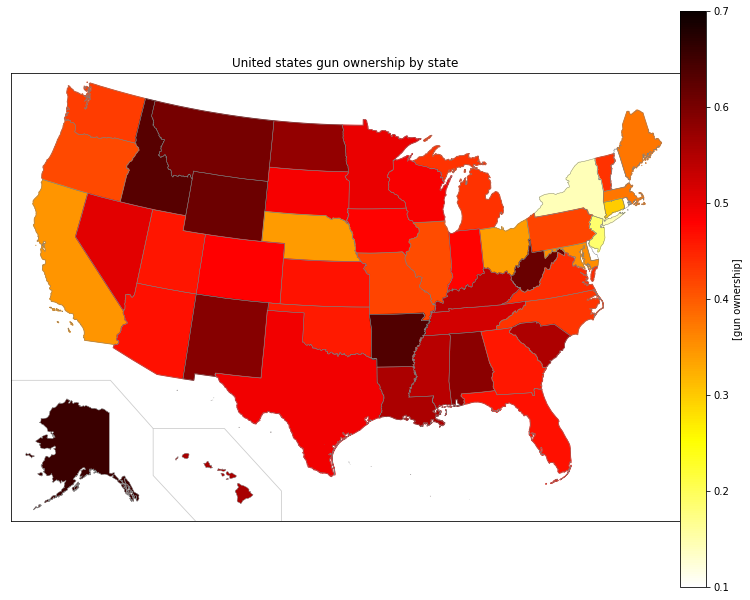

In [93]:
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

fig, ax = plt.subplots(figsize=(12,10))

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
            projection='merc',lat_ts=20)

shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

colors={}
statenames=[]
cmap = plt.cm.hot_r # use 'reversed hot' colormap
vmin = .1; vmax = .7 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico and states not included in data.
    if statename not in ['District of Columbia','Puerto Rico','New Hampshire','Rhode Island','Delaware']:
        own = gunDict[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((own-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
    
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico and states not included in data.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia','New Hampshire','Rhode Island','Delaware']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
        
AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

ax.set_title('United states gun ownership by state')

#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical',
                  label=r'[gun ownership]')

plt.show()

See heavier ownership rates in the south and up north just east of the Pacific Northwest. In the code we had to exclude states that weren't in the dataset like Rhode Island, New Hanpshire, and Delaware along with Puerto Rico and the District of Columbia which are in the states.info dictionary but aren't in the dataset.

In [80]:
killedDict = gunOwnByState.set_index('state').to_dict()['Killed per 100,000']

Create dictionary with state as the key and killed per 100,000 as the value for the map visualization.

/anaconda/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


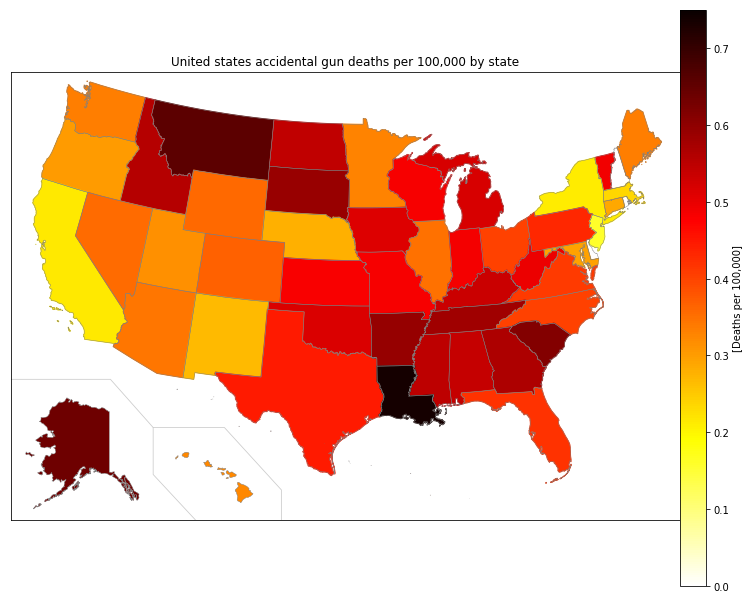

In [92]:
fig, ax = plt.subplots(figsize=(12,10))

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
            projection='merc',lat_ts=20)

shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

colors={}
statenames=[]
cmap = plt.cm.hot_r # use 'reversed hot' colormap
vmin = 0; vmax = .75 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico and states not included in data.
    if statename not in ['District of Columbia','Puerto Rico','New Hampshire','Rhode Island','Delaware']:
        killed = killedDict[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((killed-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
    
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico and states not included in data.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia','New Hampshire','Rhode Island','Delaware']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
        
AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

ax.set_title('United states accidental gun deaths per 100,000 by state')

#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical',
                  label=r'[Deaths per 100,000]')

plt.show()

You can see some states, particularly in the South, both have high rates in both graphs. Then states like New York and California have low rates in both graphs. This verifies the correlation we saw from earlier.